# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
hr_data_set = pd.read_csv('./HRDataset_v14.csv', sep=',')

hrdataset = hr_data_set

In [3]:
hrdataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

### Gender and Salary

In [4]:
subset_attributes = ['Salary']

female = hrdataset[hrdataset['GenderID'] == 0][subset_attributes]
male = hrdataset[hrdataset['GenderID'] == 1][subset_attributes]

fD = round(female.describe(), 2)
mD = round(male.describe(), 2)

pd.concat([fD, mD], axis=1, keys=['Female', 'Male'])

,Female,Male
,Salary,Salary
count,176.00,135.00
mean,67786.73,70629.40
std,25805.67,24285.29
min,45046.00,45115.00
25%,55397.50,55650.00
50%,62066.50,63353.00
75%,68238.25,75655.00
max,250000.00,178000.00


This evaluation shows the differences in salary for males and females in the company. As you can see there more females than males in the company. As you can see the mean salary of males is a bit higher than the one of the females. One female has the max salary with 250,000, where a male has only 178,000. The minimum salary is almost the same for both genders.

The data shows no significance that males get significantly more money than females in 25% and 50% quartiles. Males get more money in the top 75%, but from the data in this table no discrimination in salary can be found, because men could work in higher paid positions.

### Salaries of different races

In [5]:
subset_attributes = ['Salary', 'EmpSatisfaction']

white = hrdataset[hrdataset['RaceDesc'] == 'White'][subset_attributes]
black = hrdataset[hrdataset['RaceDesc'] == 'Black or African American'][subset_attributes]
asian = hrdataset[hrdataset['RaceDesc'] == 'Asian'][subset_attributes]
two_races = hrdataset[hrdataset['RaceDesc'] == 'Two or more races'][subset_attributes]
indian = hrdataset[hrdataset['RaceDesc'] == 'American Indian or Alaska Native'][subset_attributes]
hispanic = hrdataset[hrdataset['RaceDesc'] == 'Hispanic'][subset_attributes]

wD = round(white.describe(), 2)
bD = round(black.describe(), 2)
aD = round(asian.describe(), 2)
tD = round(two_races.describe(), 2)
iD = round(indian.describe(), 2)
hD = round(hispanic.describe(), 2)

pd.concat([wD, bD, aD, tD, iD, hD], axis=1,
          keys=['White', 'Black or African American', 'Asian', 'Two or more races', 'American Indian or Alaska Native',
                'Hispanic'])

White                 Black or African American                  \
          Salary EmpSatisfaction                    Salary EmpSatisfaction   
count     187.00          187.00                     80.00           80.00   
mean    67287.55            3.89                  74431.02            3.94   
std     24876.38            0.94                  29210.17            0.83   
min     45069.00            1.00                  46654.00            2.00   
25%     55282.50            3.00                  55236.25            3.00   
50%     62068.00            4.00                  64069.00            4.00   
75%     68914.00            5.00                  81224.75            5.00   
max    250000.00            5.00                 178000.00            5.00   

           Asian                 Two or more races                  \
          Salary EmpSatisfaction            Salary EmpSatisfaction   
count      29.00           29.00             11.00           11.00   
mean    68521.21            3.72          59998.18            3.82   
std     18046.29            0.96           6767.87            0.87   
min     45046.00            2.00          47961.00            2.00   
25%     55875.00            3.00          57054.50            3.50   
50%     64724.00            4.00          58709.00            4.00   
75%     81584.00            5.00          63493.00            4.00   
max    107226.00            5.00          71707.00            5.00   

      American Indian or Alaska Native                 Hispanic  \
                                Salary EmpSatisfaction   Salary   
count                             3.00            3.00      1.0   
mean                          65806.00            4.67  83667.0   
std                            4919.48            0.58      NaN   
min                           60724.00            4.00  83667.0   
25%                           63436.50            4.50  83667.0   
50%                           66149.00            5.00  83667.0   
75%                           68347.00            5.00  83667.0   
max                           70545.00            5.00  83667.0   

                       
      EmpSatisfaction  
count             1.0  
mean              3.0  
std               NaN  
min               3.0  
25%               3.0  
50%               3.0  
75%               3.0  
max               3.0

This evaluation shows the differences between races in the company like salary and employee satisfaction. This salary shows that **black or african american** earn the most money in the company. White, Asian and American Indian or Alaska Native Salary get about the same mean salary. The values for hispanics are not very meaningful, because the data-set contains only one hispanic person. People with two or more races earn significantly less than the other groups, but there are just 11 employees. White people are overrepresented with 180 people, followed by Black or African American with 80 people. Followed by Asians with 29 and American Indian or Alaska Native.

American Indian oder Alaska Natives have the highest employee satisfaction, whereas the other races do not show a significant difference.

### Departments and gender

In [6]:
subset_attributes = ['Department']

female = hrdataset[hrdataset['GenderID'] == 0][subset_attributes]
male = hrdataset[hrdataset['GenderID'] == 1][subset_attributes]

pd.concat([female.value_counts(), male.value_counts()], axis=1, keys=['Female Departments', 'Male Departments'])

,Female Departments,Male Departments
Department,,
Production,126,83.0
IT/IS,22,28.0
Sales,15,16.0
Admin Offices,6,3.0
Software Engineering,6,5.0
Executive Office,1,NaN


This evaluation shows in which departments females and males work in the company. Production is dominated by females with 65% females, where the IT/IS department has a few more men than females. The Software Engineering and Admin Offices has twice as many females as males.

# Univariate Analyse

## Visualizing one dimension

### Employees by gender

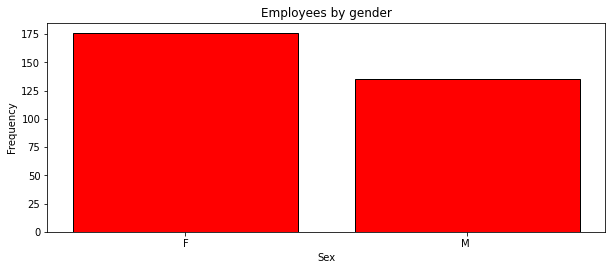

In [7]:
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Employees by gender")
ax1.set_xlabel("Sex")
ax1.set_ylabel("Frequency")
rw_q = hrdataset['Sex'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red',
               edgecolor='black', linewidth=1)

This bar chart shows than more females than men work in the company graphically. In the company there are about 56% females and 44% males.

### Department frequency

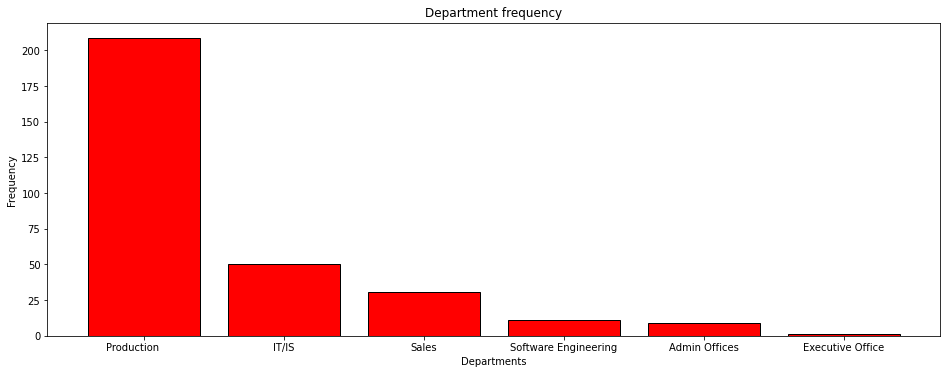

In [8]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Department frequency")
ax1.set_xlabel("Departments")
ax1.set_ylabel("Frequency")
rw_q = hrdataset['Department'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
bar2 = ax1.bar(rw_q[0], rw_q[1], color='red',
               edgecolor='black', linewidth=1)

This bar-chart shows where the most people in the company work. The main portion of the employees works in the production department, where as only a relatively small amount of people work in the IT/IS and Sales department. Only a handful of people work in the software-engineering and admin-offices department. And just one person in the executive office.

### Races

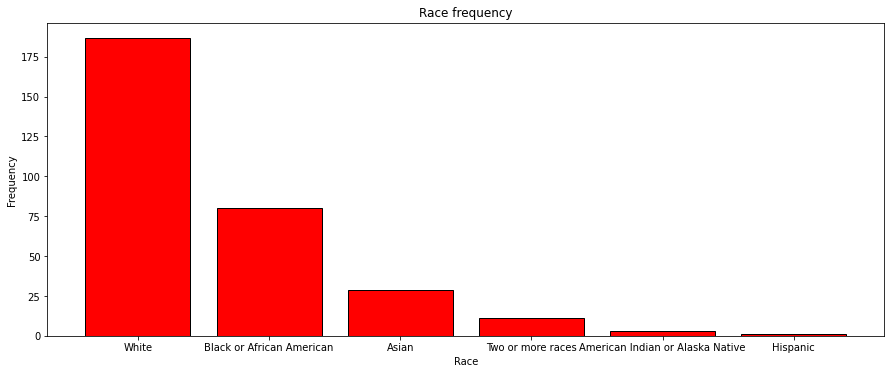

In [9]:
fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Race frequency")
ax1.set_xlabel("Race")
ax1.set_ylabel("Frequency")
rw_q = hrdataset['RaceDesc'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
bar3 = ax1.bar(rw_q[0], rw_q[1], color='red',
               edgecolor='black', linewidth=1)

This bar-chart shows how many people of which race work in the company. As you can see in the bar-chart the company is dominated by whites. Blacks also provide many people to the company, whereas Asian, Two or more races, American Indian or Alaska Native are just a small portion of the company. And only one hispanic works in the company, which is not significant.

## Visualize in two dimensions

### Martial-State and Absence

<AxesSubplot:xlabel='MaritalDesc', ylabel='Absences'>

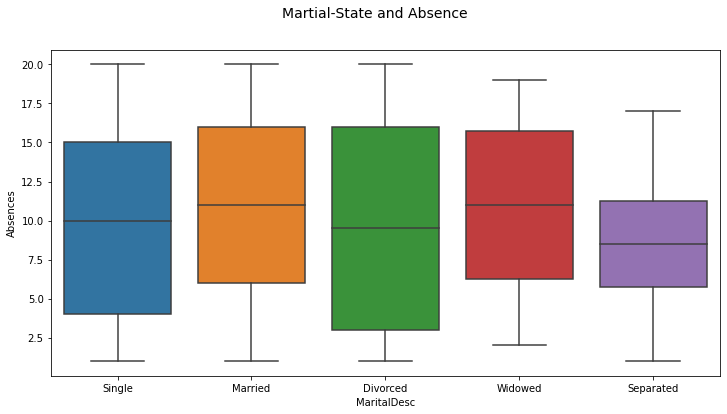

In [10]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Martial-State and Absence', fontsize=14)

sns.boxplot(x="MaritalDesc", y="Absences", data=hrdataset, ax=ax)


This boxplot shows how often people with different relationship statuses are absent. The median of married and widowed persons is almost the same, but higher than divorced and separated people. The median of single people is exactly in the middle of the plot

### Gender, Race, Income

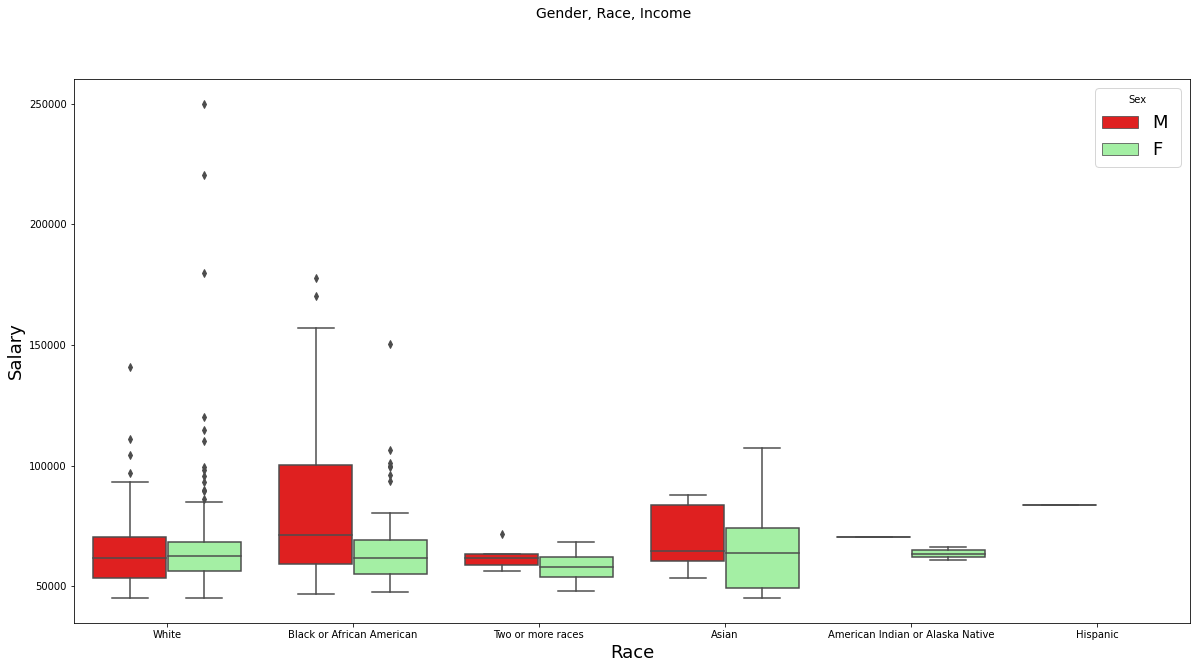

In [11]:
f, (ax1) = plt.subplots(1, 1, figsize=(20, 10))
f.suptitle('Gender, Race, Income', fontsize=14)

sns.boxplot(x="RaceDesc", y="Salary", hue="Sex",
            data=hrdataset, palette={'F': "palegreen", 'M ': "red"}, ax=ax1)
ax1.set_xlabel("Race", size=18, alpha=1)
ax1.set_ylabel("Salary", size=18, alpha=1)

l = plt.legend(loc='best', title='Sex', fontsize=18)

This boxplot shows the race with the gender and the salary in one boxplot. Black or African American males earn the most money in the company if you just go by the boxplot boundaries. The salaries of females in the boxplot boundaries is very equal throughout the company. The median salary of men stays also quite the same for all races, except Black or African American.

Many outliers to more salary are in the region of **White** and **Black or African American**. I seem that these groups have the higher position in the company. The other races do not have outliers or just 1.

The hispanic male and the American Indian or Alaska Native is not very expressive, because there just one person with that race in the company.

## Visualizing three dimensions


### Salary, Gender, Satisfaction

Text(0.5, 0, 'Salary')

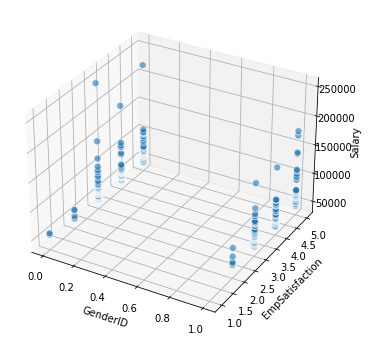

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = hrdataset['GenderID']
ys = hrdataset['EmpSatisfaction']
zs = hrdataset['Salary']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('GenderID')
ax.set_ylabel('EmpSatisfaction')
ax.set_zlabel('Salary')

This graphic shows the relation of gender, with satisfaction and the salary. This graphic shows that gender makes no difference in the salary. The employee satisfaction seems to have an influence in the salary. Satisfied people earn more money in the company. The most satisfaction is in the area 3-5. Not very many employees are in the range 1-2.